<a href="https://colab.research.google.com/github/sarobar412/machine_learning-and-deep-learning/blob/main/Customer_leaving_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing of Libraries

In [3]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

Loading the dataset into a pandas dataframe

In [4]:
df=pd.read_csv('/content/HR_comma_sep.csv')

Visualizing the dataframe

In [5]:
df.head()

,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,satisfaction_level,left,promotion_last_5years,role,salary
0,0.53,2,157,3,0,0.38,1,0,sales,low
1,0.86,5,262,6,0,0.80,1,0,sales,medium
2,0.88,7,272,4,0,0.11,1,0,sales,medium
3,0.87,5,223,5,0,0.72,1,0,sales,low
4,0.52,2,159,3,0,0.37,1,0,sales,low


In [19]:
df.drop('role', axis='columns', inplace=True)
df['salary'].replace(['low', 'medium', 'high'], [0,1,2], inplace=True)
df

,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,satisfaction_level,left,promotion_last_5years,salary
0,0.53,2,157,3,0,0.38,1,0,0
1,0.86,5,262,6,0,0.80,1,0,1
2,0.88,7,272,4,0,0.11,1,0,1
3,0.87,5,223,5,0,0.72,1,0,0
4,0.52,2,159,3,0,0.37,1,0,0
...,...,...,...,...,...,...,...,...,...
14994,0.57,2,151,3,0,0.40,1,0,0
14995,0.48,2,160,3,0,0.37,1,0,0
14996,0.53,2,143,3,0,0.37,1,0,0
14997,0.96,6,280,4,0,0.11,1,0,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   last_evaluation        14999 non-null  float64
 1   number_project         14999 non-null  int64  
 2   average_montly_hours   14999 non-null  int64  
 3   time_spend_company     14999 non-null  int64  
 4   Work_accident          14999 non-null  int64  
 5   satisfaction_level     14999 non-null  float64
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 1.0 MB


In [21]:
X = df.drop('left',axis='columns')
Y=df['left']

In [22]:
X=np.asarray(X)
Y=np.asarray(Y)

Normalizing the Dataset

In [23]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.08727529, -1.46286291, -0.88203988, -0.34123516, -0.41116529,
        -0.93649469, -0.14741182, -0.93336794],
       [ 0.84070693,  0.97111292,  1.22042276,  1.71343614, -0.41116529,
         0.75281433, -0.14741182,  0.63609235],
       [ 0.95755433,  2.59376348,  1.4206573 ,  0.34365527, -0.41116529,
        -2.02247906, -0.14741182,  0.63609235],
       [ 0.89913063,  0.97111292,  0.43950807,  1.02854571, -0.41116529,
         0.43104118, -0.14741182, -0.93336794],
       [-1.14569899, -1.46286291, -0.84199297, -0.34123516, -0.41116529,
        -0.97671633, -0.14741182, -0.93336794]])

Train-Test split

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (11999, 8) (11999,)
Test set: (3000, 8) (3000,)


Modeling (Logistic Regression with Scikit-learn)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

Now we can predict using our test set:

In [27]:
yhat = LR.predict(X_test)
yhat

array([0, 1, 0, ..., 0, 0, 0])

In [28]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.89111299, 0.10888701],
       [0.43853385, 0.56146615],
       [0.77370327, 0.22629673],
       ...,
       [0.58174071, 0.41825929],
       [0.6400743 , 0.3599257 ],
       [0.68928257, 0.31071743]])

Evaluation

Jaccard Index

In [29]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.7714701601164483

confusion matrix

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 252  461]
 [ 167 2120]]


Confusion matrix, without normalization
[[ 252  461]
 [ 167 2120]]


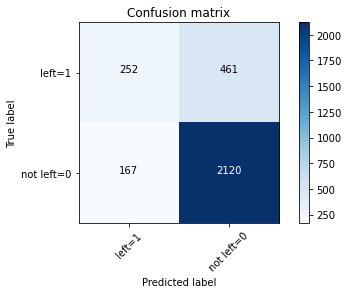

In [32]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['left=1','not left=0'],normalize= False,  title='Confusion matrix')

In [33]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [34]:
yhat = clf.predict(X_test)
yhat [0:5]

array([0, 1, 0, 0, 0])

In [35]:
jaccard_score(y_test, yhat,pos_label=0)

0.9570212765957447

Jaccard Score is increased 

Confusion matrix, without normalization
[[ 650   63]
 [  38 2249]]


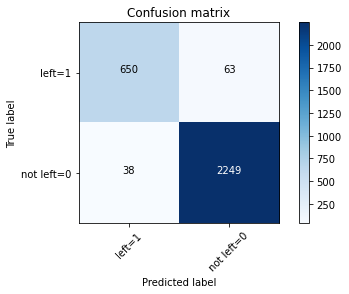

In [36]:
conf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix, classes=['left=1','not left=0'],normalize= False,  title='Confusion matrix')

Therefore the result is improved using Support Vector Machine